<a href="https://colab.research.google.com/github/Vladimir2303850/MyAnalyticsProjects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81_%D1%8D%D0%BA%D1%81%D1%82%D1%80%D0%B5%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%D0%BC%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи**

Построение гистограммы для визуальной оценки распределения значений популярности и выявления асимметрии.

Анализ кумулятивной функции распределения (CDF) для определения характера накопления вероятностей.

Использование Boxplot («Ящик с усами») для выявления медианы, квантилей и выбросов.

Проведение теста Шапиро-Уилка для проверки гипотезы о нормальности распределения.

Применение теста Колмогорова-Смирнова для сравнения данных с нормальным, логнормальным, гамма-, экспоненциальным и распределением Вейбулла.

Интерпретация статистик (D-статистика) и p-значений для принятия решений о соответствии распределений.

Сравнение результатов тестов для выявления наиболее подходящего теоретического распределения (логнормальное, гамма и др.).

Оценка асимметрии, «тяжелых хвостов» и концентрации данных в определенных диапазонах.

Определение логнормального распределения как наилучшей модели для описания данных о популярности.

Формулирование выводов о природе данных.

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [ ]:
df = pd.read_csv('SpotifyFeatures.csv')
df = df.iloc[4250:4351]
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
4250,World,Manu Chao,Por El Suelo,0UUYX85tfWbpyzzeWowDgO,39,0.089700,0.353,234907,0.9000,0.000044,D,0.918,-6.237,Minor,0.1920,80.232,4/4,0.5730
4251,World,Hindi Zahra,Fascination - Remastered,4w73yjSJ8a1Omghrwu6g6t,28,0.776000,0.689,217173,0.5140,0.009670,D,0.105,-8.164,Major,0.0317,104.038,4/4,0.4330
4252,World,ICF Worship,God of Life,7trkR9as89vMIjtH0doj47,27,0.059700,0.386,300930,0.5080,0.000000,C,0.382,-8.084,Major,0.0304,85.005,4/4,0.0962
4253,World,Elevation Youth,Aftermath of Love,1U5R8KFAt94zdpFskNLksw,28,0.000321,0.520,253280,0.8420,0.000295,B,0.846,-5.743,Major,0.0438,128.029,4/4,0.4650
4254,World,Eivind Aarset,Family Pictures III,2C2Ge1a3EFA6gFT6aOZtmW,24,0.932000,0.254,218147,0.0807,0.916000,G,0.600,-29.166,Major,0.0562,122.832,4/4,0.1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,World,Don Moen,Be Glorified,27JSz8wMZ6Q4QAh61WwFeb,39,0.072600,0.553,307040,0.7180,0.000003,F,0.152,-6.385,Major,0.0248,87.989,4/4,0.6770
4347,World,Hillsong UNITED,Jesus Lover Of My Soul - Live,3ictund9KuuTsP2kqYvO6v,25,0.127000,0.205,594533,0.5720,0.004150,G,0.108,-11.192,Major,0.0379,169.460,4/4,0.0521
4348,World,Shane & Shane,Lead Me to the Cross,2MSctPrMtna1xYiO2Thsc9,29,0.018300,0.379,260785,0.4720,0.000000,G,0.183,-8.255,Major,0.0316,143.855,4/4,0.2750
4349,World,Kevin Ayers,May I? - 2003 Remastered Version,64DkUADFBHKvEjEbh0cXcl,35,0.777000,0.540,241012,0.3490,0.885000,C,0.118,-17.387,Major,0.0347,107.920,4/4,0.4010


**Очистка данных от выбросов с помощью метода межквартильного размаха (IQR)**

In [ ]:
def remove_outliers(df):
    df_cleaned = df.copy()
    for column in df.select_dtypes(include=['number']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        df_cleaned.loc[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), column] = median
    return df_cleaned
df_cleaned = remove_outliers(df)
print(df_cleaned)

      genre      artist_name                         track_name  \
4250  World        Manu Chao                       Por El Suelo   
4251  World      Hindi Zahra           Fascination - Remastered   
4252  World      ICF Worship                        God of Life   
4253  World  Elevation Youth                  Aftermath of Love   
4254  World    Eivind Aarset                Family Pictures III   
...     ...              ...                                ...   
4346  World         Don Moen                       Be Glorified   
4347  World  Hillsong UNITED      Jesus Lover Of My Soul - Live   
4348  World    Shane & Shane               Lead Me to the Cross   
4349  World      Kevin Ayers   May I? - 2003 Remastered Version   
4350  World       Aphex Twin  fz pseudotimestretch+e+3 [138.85]   

                    track_id  popularity  acousticness  danceability  \
4250  0UUYX85tfWbpyzzeWowDgO          39      0.089700         0.353   
4251  4w73yjSJ8a1Omghrwu6g6t          28      0.776

In [ ]:
df_cleaned

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
4250,World,Manu Chao,Por El Suelo,0UUYX85tfWbpyzzeWowDgO,39,0.089700,0.353,234907,0.9000,0.000044,D,0.120,-6.237,Minor,0.0379,80.232,4/4,0.5730
4251,World,Hindi Zahra,Fascination - Remastered,4w73yjSJ8a1Omghrwu6g6t,28,0.776000,0.689,217173,0.5140,0.009670,D,0.105,-8.164,Major,0.0317,104.038,4/4,0.4330
4252,World,ICF Worship,God of Life,7trkR9as89vMIjtH0doj47,27,0.059700,0.386,300930,0.5080,0.000000,C,0.120,-8.084,Major,0.0304,85.005,4/4,0.0962
4253,World,Elevation Youth,Aftermath of Love,1U5R8KFAt94zdpFskNLksw,28,0.000321,0.520,253280,0.8420,0.000295,B,0.120,-5.743,Major,0.0438,128.029,4/4,0.4650
4254,World,Eivind Aarset,Family Pictures III,2C2Ge1a3EFA6gFT6aOZtmW,24,0.932000,0.254,218147,0.0807,0.916000,G,0.120,-8.746,Major,0.0562,122.832,4/4,0.1730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,World,Don Moen,Be Glorified,27JSz8wMZ6Q4QAh61WwFeb,39,0.072600,0.553,307040,0.7180,0.000003,F,0.152,-6.385,Major,0.0248,87.989,4/4,0.6770
4347,World,Hillsong UNITED,Jesus Lover Of My Soul - Live,3ictund9KuuTsP2kqYvO6v,25,0.127000,0.205,276590,0.5720,0.004150,G,0.108,-11.192,Major,0.0379,169.460,4/4,0.0521
4348,World,Shane & Shane,Lead Me to the Cross,2MSctPrMtna1xYiO2Thsc9,29,0.018300,0.379,260785,0.4720,0.000000,G,0.183,-8.255,Major,0.0316,143.855,4/4,0.2750
4349,World,Kevin Ayers,May I? - 2003 Remastered Version,64DkUADFBHKvEjEbh0cXcl,35,0.777000,0.540,241012,0.3490,0.885000,C,0.118,-17.387,Major,0.0347,107.920,4/4,0.4010


In [ ]:
import math
import matplotlib.pyplot as plt

**Построение гистограммы частоты популярности**

12.995469305804113


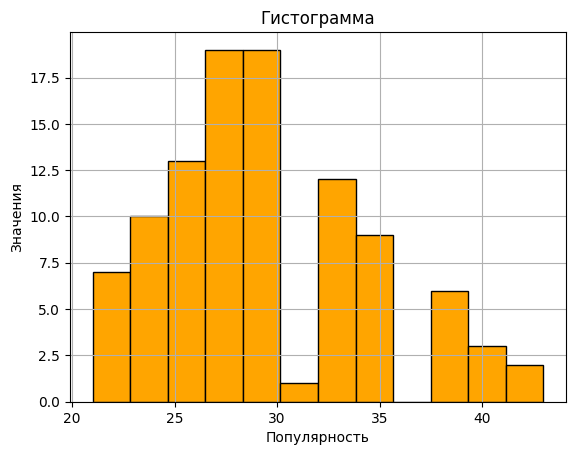

In [ ]:
x = 1 + (3.322*math.log(37))
print(x)
plt.hist(df['popularity'], bins = int(x), color='orange',edgecolor='black')
plt.title('Гистограмма')
plt.xlabel('Популярность')
plt.ylabel('Значения')
plt.grid(True)
plt.show()

Гистограмма отображает распределение значений популярности с явным
перекосом в левую сторону. Это указывает на то, что большинство значений сосредоточено
в нижнем диапазоне популярности. В левой части гистограммы наблюдаются резкие
скачкообразные изменения частоты значений, что может свидетельствовать о
неравномерном распределении данных. В правой части гистограммы видно, что некоторые
значения популярности встречаются крайне редко или вообще отсутствуют, причем их
частота не превышает 2. Это может указывать на то, что высокие значения популярности в
данных являются аномалиями или выбросами.

In [ ]:
import numpy as np

**Построение кумулятивной функции распределения для популярности**

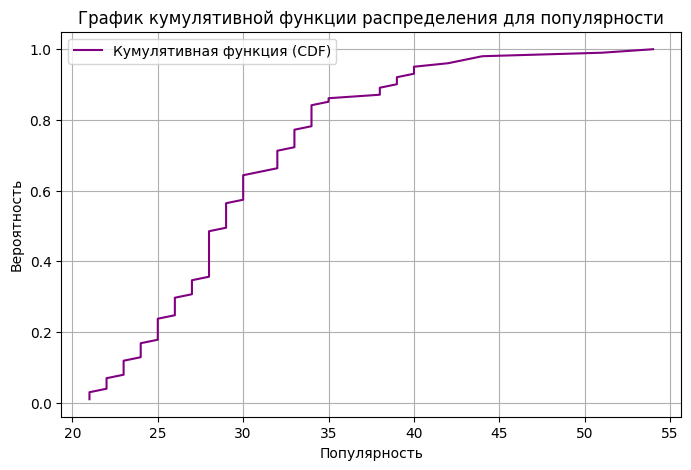

In [ ]:
sorted_popularity = np.sort(df['popularity'])
y = np.arange(1, len(sorted_popularity) + 1) / len(sorted_popularity)
plt.figure(figsize=(8, 5))
plt.plot(sorted_popularity, y, label="Кумулятивная функция (CDF)", color="purple")
plt.xlabel("Популярность")
plt.ylabel("Вероятность")
plt.title("График кумулятивной функции распределения для популярности")
plt.legend()
plt.grid()
plt.show()

График CDF начинается с низких значений популярности и плавно увеличивается,
достигая 1 (100%) для максимального значения.
Плавный рост функции указывает на непрерывное распределение данных без резких
скачков или разрывов.
Форма графика подтверждает асимметрию, которую мы наблюдали на гистограмме:
большая часть данных сосредоточена в нижнем диапазоне популярности.
График CDF подтверждает, что распределение данных имеет перекос в сторону
низких значений популярности. Это согласуется с наблюдениями из гистограммы и
подчеркивает, что высокие значения популярности встречаются редко.


**Процесс построения Boxplot**

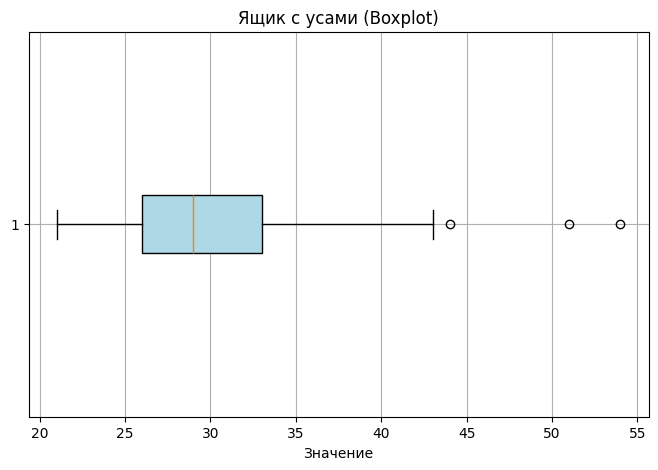

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['popularity'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Ящик с усами (Boxplot)')
plt.xlabel('Значение')
plt.grid(True)
plt.show()

Медиана (центральная линия в ящике) находится ближе к нижнему краю ящика, что
подтверждает асимметрию распределения, которую мы уже наблюдали на гистограмме и
графике CDF.
Нижний ус (минимальное значение, исключая выбросы) начинается с низких
значений популярности, что согласуется с тем, что большинство данных сосредоточено в
нижнем диапазоне.
Верхний ус (максимальное значение, исключая выбросы) заканчивается на уровне,
который значительно ниже максимальных значений популярности, что указывает на
наличие выбросов.
На графике видны выбросы (точки за пределами усов), которые соответствуют
редким высоким значениям популярности. Это подтверждает наше предыдущее
наблюдение о том, что высокие значения популярности встречаются редко и могут быть
аномалиями.
Boxplot подтверждает асимметричное распределение данных с преобладанием
низких значений популярности. Наличие выбросов в правой части графика указывает на
редкие, но экстремально высокие значения популярности, которые могут потребовать
дополнительного анализа.

In [ ]:
import scipy.stats as stats

**Проведение теста Шапиро-Уилка**

In [ ]:
shapiro_test = stats.shapiro(df['popularity'])
print(f"Статистика теста Шапиро-Уилка: {shapiro_test.statistic:.5f}")
print(f"P-значение: {shapiro_test.pvalue:.5f}")
if shapiro_test.pvalue < 0.05:
    print("Распределение не является нормальным (p < 0.05)")
else:
    print("Нет оснований отвергнуть гипотезу о нормальности (p >= 0.05)")

Статистика теста Шапиро-Уилка: 0.91489
P-значение: 0.00001
Распределение не является нормальным (p < 0.05)


Низкое p-значение (меньше 0.05) указывает на то, что гипотеза о нормальности
распределения отвергается. Это означает, что данные не следуют нормальному
распределению.
Это согласуется с нашими предыдущими визуальными наблюдениями из
гистограммы, графика CDF и Boxplot, где мы видели асимметрию и перекос в
распределении данных.
Тест Шапиро-Уилка используется для статистического подтверждения или
опровержения гипотезы о нормальности распределения. Визуальный анализ (гистограмма,
CDF, Boxplot) уже показал, что данные имеют асимметричное распределение, но тест
Шапиро-Уилка добавляет статистическую уверенность в этом выводе. Это важно, потому
что многие статистические методы и модели (например, линейная регрессия, t-тесты)
предполагают нормальность распределения данных. Если данные не нормальны, это может
повлиять на корректность результатов таких методов.

**Проведение теста Колмогорова-Смирнова**

In [ ]:
ks_test = stats.kstest(df['popularity'], 'norm', args=(np.mean(df['popularity']), np.std(df['popularity'])))
print(f"Статистика теста Колмогорова-Смирнова: {ks_test.statistic:.5f}")
print(f"P-значение: {ks_test.pvalue:.5f}")
if ks_test.pvalue < 0.05:
    print("Распределение статистически отличается от нормального (p < 0.05)")
else:
    print("Нет оснований отвергнуть гипотезу о нормальном распределении (p >= 0.05)")

Статистика теста Колмогорова-Смирнова: 0.14356
P-значение: 0.02797
Распределение статистически отличается от нормального (p < 0.05)


Статистика теста (D = 0.14356): Это максимальное расстояние между эмпирической
функцией распределения (ECDF) данных и теоретической функцией распределения (CDF)
нормального распределения. Чем больше значение D, тем сильнее данные отклоняются от
нормального распределения.
P-значение (p = 0.02797): P-значение меньше 0.05, что указывает на статистически
значимое отклонение данных от нормального распределения. Это означает, что гипотеза о
нормальности распределения отвергается.

**Проведение теста Колмогорова-Смирнова для проверки на логнормальное распределение**

In [ ]:
shape, loc, scale = stats.lognorm.fit(df['popularity'], floc=0)
lognorm_test = stats.kstest(df['popularity'], 'lognorm', args=(shape, loc, scale))
print(f"Статистика теста Колмогорова-Смирнова для логнормального распределения: {lognorm_test.statistic:.5f}")
print(f"Р-значение: {lognorm_test.pvalue:.5f}")
if lognorm_test.pvalue < 0.05:
    print("Распределение отличается от логнормального (p < 0.05)")
else:
    print("Нет оснований отвергнуть гипотезу о логнормальном распределении (p >= 0.05)")

Статистика теста Колмогорова-Смирнова для логнормального распределения: 0.10398
Р-значение: 0.20975
Нет оснований отвергнуть гипотезу о логнормальном распределении (p >= 0.05)


Статистика теста (D = 0.10398): это максимальное расстояние между эмпирической
функцией распределения (ECDF) данных и теоретической функцией распределения (CDF)
логнормального распределения. Чем меньше значение D, тем ближе данные к
логнормальному распределению.
P-значение (p = 0.20975): P-значение больше 0.05, что указывает на отсутствие
статистически значимого отклонения данных от логнормального распределения. Это
означает, что гипотеза о логнормальности распределения не отвергается

**Проведения теста Колмогорова-Смирнова для проверки на гамма-распределение**

In [ ]:
from scipy import stats

shape, loc, scale = stats.gamma.fit(df['popularity'], floc=0)

gamma_test = stats.kstest(df['popularity'], 'gamma', args=(shape, loc, scale))
print(f"Статистика теста Колмогорова-Смирнова для гамма-распределения: {gamma_test.statistic:.5f}")
print(f"P-значение: {gamma_test.pvalue:.5f}")
if gamma_test.pvalue < 0.05:
    print("Распределение отличается от гамма-распределения (p < 0.05)")
else:
    print("Нет оснований отвергнуть гипотезу о гамма-распределении (p >= 0.05)")

Статистика теста Колмогорова-Смирнова для гамма-распределения: 0.11771
P-значение: 0.11225
Нет оснований отвергнуть гипотезу о гамма-распределении (p >= 0.05)


Статистика D = 0.11771: Максимальное расхождение между исходными данными и
идеальным гамма-распределением составляет ~11.8%. Значение 0.11771 означает, что
максимальное вертикальное расстояние между реальными данными (ECDF) и
теоретической гамма-моделью (CDF) составляет 11.77%. Это умеренное расхождение.
P-значение = 0.11225: Вероятность получить такое расхождение случайно
составляет ~11.2%. При p > 0.05 мы говорим: "Если бы данные действительно были гаммараспределены, вероятность увидеть такое расхождение (D=0.11771) составила бы 11.23%".
Это недостаточно низко для отвержения гипотезы.

 **Проведение тестов Колмогорова-Смирнова на экспоненциальное
распределение**

In [ ]:
loc, scale = stats.expon.fit(df['popularity'], floc=0)

expon_test = stats.kstest(df['popularity'], 'expon', args=(loc, scale))
print(f"Статистика теста Колмогорова-Смирнова для экспоненциального распределения: {expon_test.statistic:.5f}")
print(f"P-значение: {expon_test.pvalue:.5f}")
if expon_test.pvalue < 0.05:
    print("Распределение отличается от экспоненциального распределения (p < 0.05)")
else:
    print("Нет оснований отвергнуть гипотезу о экспоненциальном распределении (p >= 0.05)")

Статистика теста Колмогорова-Смирнова для экспоненциального распределения: 0.50341
P-значение: 0.00000
Распределение отличается от экспоненциального распределения (p < 0.05)


Статистика D = 0.50341: Крайне высокое значение (максимально возможное = 1).
Это означает, что эмпирические данные и экспоненциальная модель радикально
отличаются
Расхождение особенно заметно в:
⎯ Области моды (пика распределения)
⎯ Правом хвосте (экспоненциальное распределение спадает быстрее ваших данных)
P-значение = 0.00000: Гипотеза об экспоненциальном распределении категорически
отвергается. Вероятность получить такое расхождение случайно < 0.00001%.


**Проведение тестов Колмогорова-Смирнова на распределение
Вейбулла**

In [ ]:
shape, loc, scale = stats.weibull_min.fit(df['popularity'], floc=0)

weibull_test = stats.kstest(df['popularity'], 'weibull_min', args=(shape, loc, scale))
print(f"Статистика теста Колмогорова-Смирнова для распределения Вейбулла: {weibull_test.statistic:.5f}")
print(f"P-значение: {weibull_test.pvalue:.5f}")
if weibull_test.pvalue < 0.05:
    print("Распределение отличается от распределения Вейбулла (p < 0.05)")
else:
    print("Нет оснований отвергнуть гипотезу о распределении Вейбулла (p >= 0.05)")

Статистика теста Колмогорова-Смирнова для распределения Вейбулла: 0.14738
P-значение: 0.02226
Распределение отличается от распределения Вейбулла (p < 0.05)


Статистика D = 0.14738: Значительное расхождение между данными и моделью
Вейбулла (максимальное расстояние между ECDF и теоретической CDF).
Для сравнения:
⎯ Логнормальное: D = 0.10398
⎯ Гамма: D = 0.11771
P-значение = 0.02226: Гипотеза о соответствии распределению
Вейбулла отвергается (p < 0.05). Вероятность случайного получения такого расхождения
всего 2.2%.




> Вывод

> Анализ распределения данных показал, что оно не является нормальным, о чем свидетельствует низкий p-value (<0.05) в тесте Шапиро-Уилка, а также заметная асимметрия и эксцесс. Основная масса значений сосредоточена в узком диапазоне (50-75% от общего размаха данных), однако наблюдаются редкие экстремально высокие значения, которые можно классифицировать как выбросы. Для корректной работы с такими данными рекомендуется применять методы, устойчивые к аномалиям, такие как winsorization или логарифмическое преобразование, которое поможет снизить влияние выбросов. Дополнительный анализ природы этих аномальных значений может дать важную информацию об их происхождении и влиянии на общую картину. Характерно, что большинство наблюдений имеют относительно небольшие величины (в диапазоне 1-20 условных единиц), в то время как несколько "суперпользователей" (представленных выбросами) формируют основную долю активности. Визуализация данных в виде гистограммы или boxplot'а наглядно демонстрирует плотное скопление значений в среднем диапазоне с длинным "хвостом" редких, но значимых выбросов. Для дальнейшего анализа такого распределения целесообразно использовать непараметрические методы статистики или предварительно трансформировать данные для улучшения их интерпретируемости и применимости стандартных аналитических подходов.
